In [1]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [2]:
# import nltk
# nltk.download('vader_lexicon')

In [3]:
df = pd.read_csv('new_data/train.csv')

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
def textblob_score(text: str) -> float:
    # pip install textblob
    return TextBlob(str(text)).sentiment.polarity

In [29]:
def vader_score(text: str) -> float:
    score = vader.polarity_scores(str(text))
    return pd.Series(score)

In [7]:
vader_score("my name is eee")

neg         0.0
neu         1.0
pos         0.0
compound    0.0
dtype: float64

In [8]:
df['textblob_score'] = df['content'].apply(textblob_score)

In [27]:
df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_comp']] = df.apply(lambda row: vader_score(row['content']), axis=1)

In [30]:
df[['vader_l_neg', 'vader_l_neu', 'vader_l_pos', 'vader_l_comp']] = df.apply(lambda row: vader_score(row['content_lemma']), axis=1)

In [10]:
df['textblob_lemma_score'] = df['content_lemma'].apply(textblob_score)

In [11]:
df


,content,sentiment,sentiment_labels,content_lemma,content_len,content_lemma_len,textblob_score,vader_neg,vader_neu,vader_pos,vader_comp,textblob_lemma_score
0,i should be sleep but im not! thinking about ...,sadness,10,sleep be ! think old friend want . married ....,128,76,0.220833,0.267,0.563,0.170,-0.6458,0.245312
1,cant fall asleep,neutral,8,not fall asleep,17,15,0.000000,0.000,1.000,0.000,0.0000,0.000000
2,got the news,surprise,11,get news,13,8,0.000000,0.000,1.000,0.000,0.0000,0.000000
3,agreed,love,7,agree,7,5,0.000000,0.000,0.000,1.000,0.2732,0.000000
4,lady gaga tweeted about not being impressed by...,worry,12,lady gaga tweet impress video leak know,82,39,1.000000,0.154,0.846,0.000,-0.3724,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
12101,happy mother's day oprah. you're a mom to you...,love,7,happy mother day oprah . mom girl !,59,37,1.000000,0.000,0.693,0.307,0.6114,1.000000
12102,just finished watching he's just not that into...,neutral,8,finish watch . love .,63,23,0.700000,0.000,0.719,0.281,0.5994,0.500000
12103,hanging with my cousin jimmy then hopefully ha...,fun,4,hang cousin jimmy hopefully hang friend,67,39,0.000000,0.000,0.604,0.396,0.7096,0.000000
12104,i had a great date last night.tried to find th...,happiness,5,great date night.tried find cdcave daniel hi...,93,61,0.391667,0.000,0.628,0.372,0.8268,0.587500


In [12]:
df.columns

Index(['content', 'sentiment', 'sentiment_labels', 'content_lemma',
       'content_len', 'content_lemma_len', 'textblob_score', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_comp', 'textblob_lemma_score'],
      dtype='object')

In [13]:
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt


Text(0,0.5,'Label')

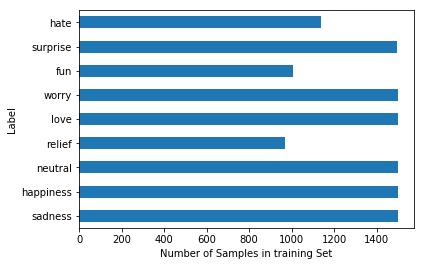

In [14]:
ax = df['sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")

## content's textblob score vs sentiment

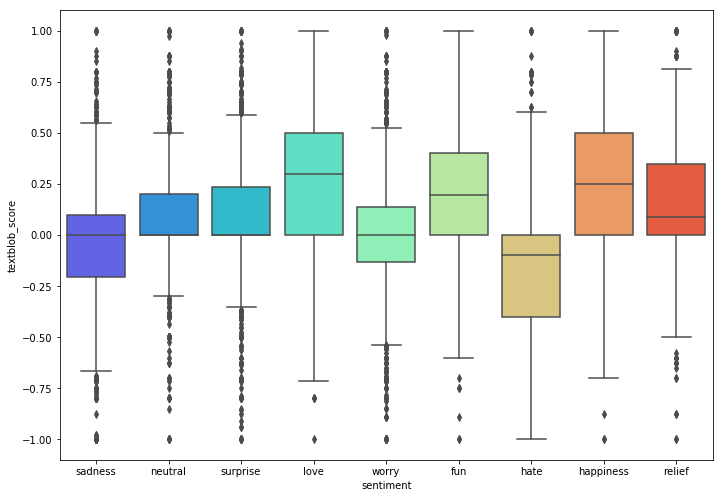

In [15]:
g = sns.boxplot(x='sentiment',y='textblob_score', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## content lemma's textblob score vs sentiment

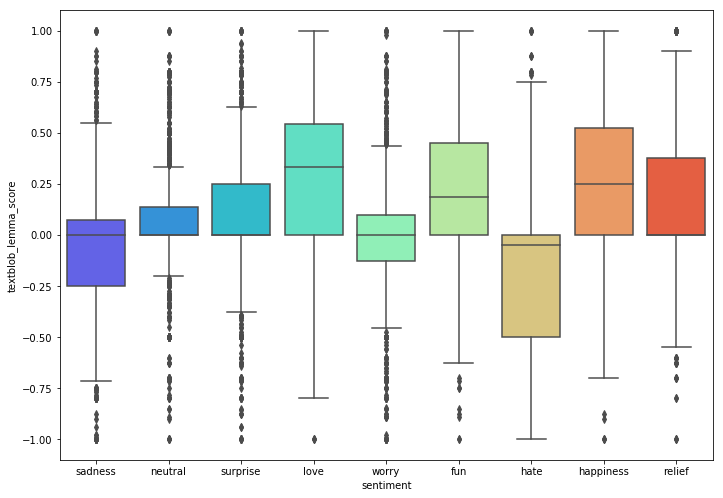

In [16]:
g = sns.boxplot(x='sentiment',y='textblob_lemma_score', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## vader neg vs sentiment

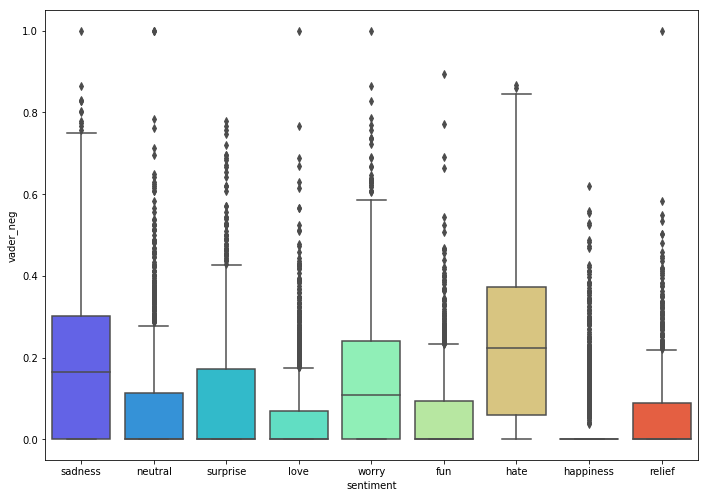

In [23]:
g = sns.boxplot(x='sentiment',y='vader_neg', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## vader neu vs sentiment

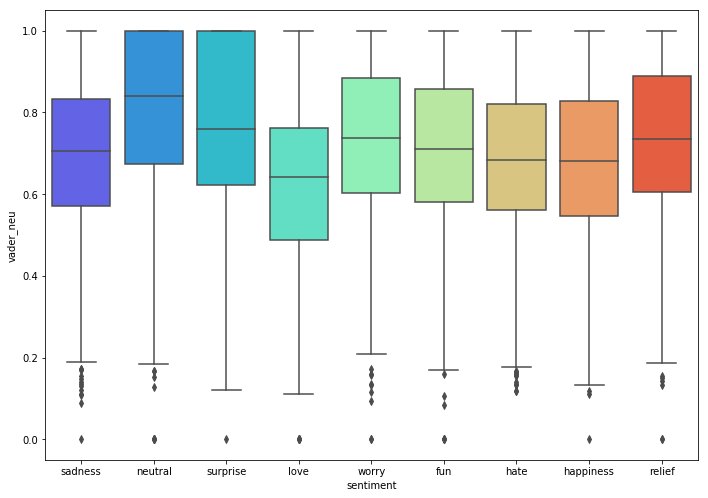

In [24]:
g = sns.boxplot(x='sentiment',y='vader_neu', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## vader pos vs sentiment

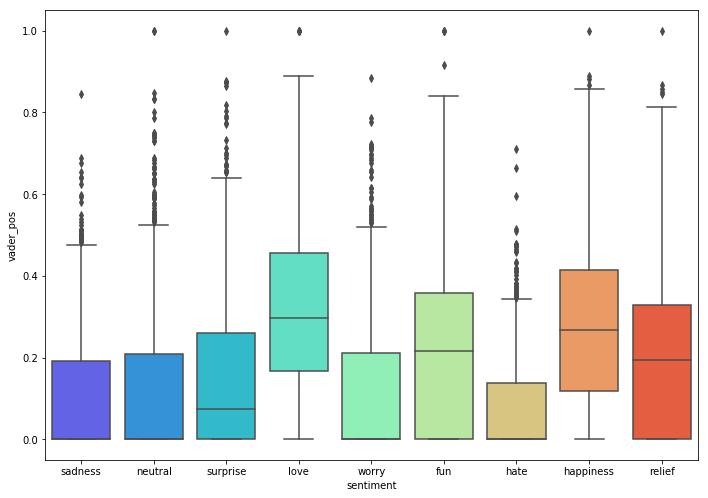

In [25]:
g = sns.boxplot(x='sentiment',y='vader_pos', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## vader compound vs sentiment

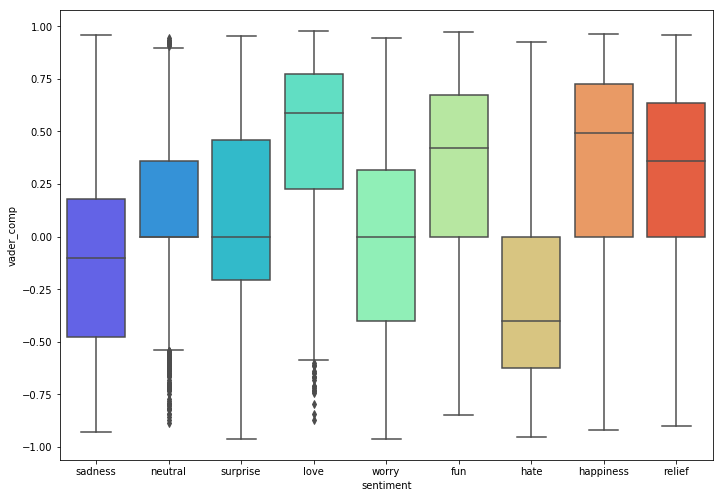

In [26]:
g = sns.boxplot(x='sentiment',y='vader_comp', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## lemma's vader neg vs sentiment

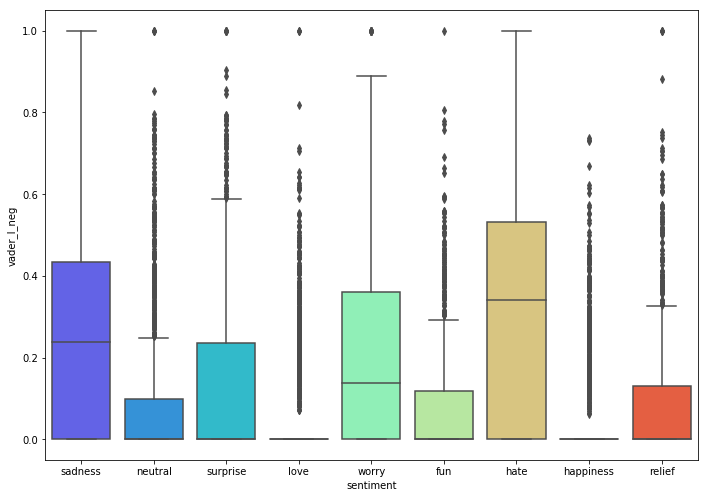

In [31]:
g = sns.boxplot(x='sentiment',y='vader_l_neg', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## lemma's vader neu vs sentiment

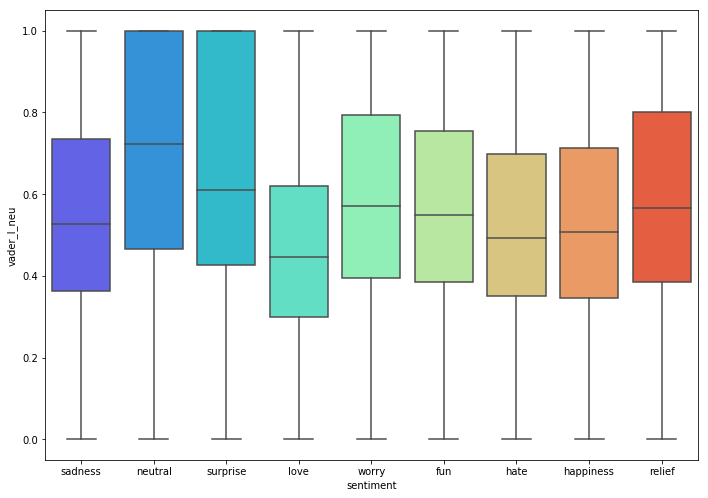

In [32]:
g = sns.boxplot(x='sentiment',y='vader_l_neu', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## lemma's vader pos vs sentiment

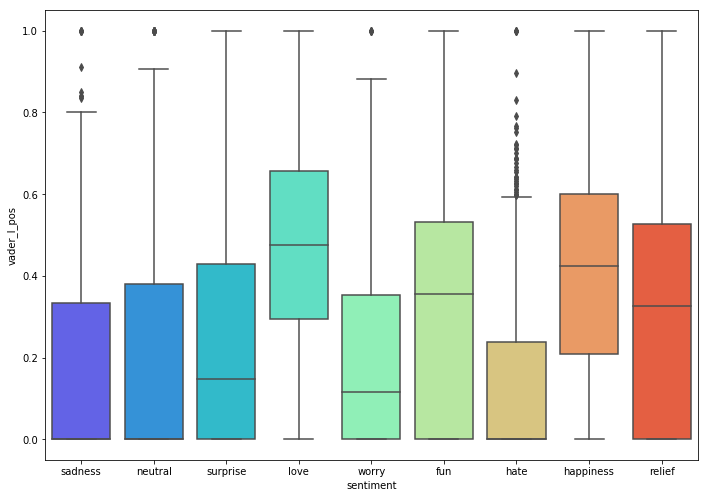

In [33]:
g = sns.boxplot(x='sentiment',y='vader_l_pos', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)


## lemma's vader compound vs sentiment

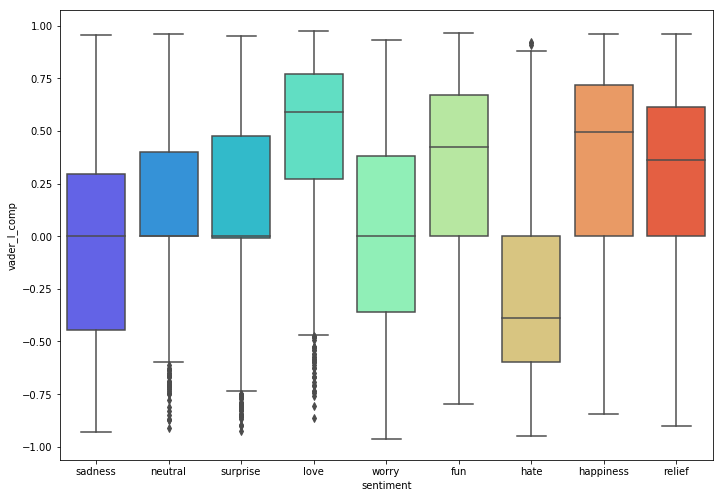

In [34]:
g = sns.boxplot(x='sentiment',y='vader_l_comp', data=df,palette='rainbow')
plt.gcf().set_size_inches(11.7, 8.27)
